# 共起ネットワーク

## 前準備

必要なライブラリのインポート

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

関数の定義

In [14]:
def dftodict(df):
    return {pair: (count, jaccrad) for pair, count, jaccrad in df.itertuples()}

データの読み込み

In [2]:
cas = pd.read_csv('src/categories.csv')

In [3]:
qus_title_terms = pd.read_csv('dst/jaccard/qus_title_terms.csv')


In [4]:
qus_title_terms.drop(qus_title_terms.columns[0], axis='columns', inplace=True)

In [8]:
qus_title_terms

出現回数   Jaccard
用語1     用語2                   
美人局     被害         4  0.007353
最善      被害         1  0.001934
振舞う     被害         1  0.002037
最善      美人局        1  0.012048
振舞う     美人局        1  0.017544
...              ...       ...
椎間板ヘルニア 無理         1  0.006579
歩く      退職         1  0.000517
        無理         1  0.005587
他人名義    携帯電話料金     1  0.014085
タイムカード  労働問題       1  0.005780

[967415 rows x 2 columns]

In [9]:
qus_title_terms.set_index(['用語1', '用語2'], inplace=True)

KeyError: "None of ['用語1', '用語2'] are in the columns"

In [ ]:
qus_title_terms.index

MultiIndex([(    '美人局',      '被害'),
            (     '最善',      '被害'),
            (    '振舞う',      '被害'),
            (     '最善',     '美人局'),
            (    '振舞う',     '美人局'),
            (    '振舞う',      '最善'),
            (    '不具合',    '責任所在'),
            ('アプリ新品商品',     '不具合'),
            (    'フリマ',     '不具合'),
            ('アプリ新品商品',    '責任所在'),
            ...
            (  '受け入れる',      '無理'),
            (     '仕事', '椎間板ヘルニア'),
            (     '仕事',      '歩く'),
            ('椎間板ヘルニア',      '歩く'),
            ('椎間板ヘルニア',      '退職'),
            ('椎間板ヘルニア',      '無理'),
            (     '歩く',      '退職'),
            (     '歩く',      '無理'),
            (   '他人名義',  '携帯電話料金'),
            ( 'タイムカード',    '労働問題')],
           names=['用語1', '用語2'], length=967415)

In [15]:
qus_title_dict = dftodict(qus_title_terms)

In [ ]:
qus_title_terms = pd.read_csv('dst/jaccard/qus_title_terms.csv')
qus_body_terms = pd.read_csv('dst/jaccard/qus_body_terms.csv')
ans_body_terms = pd.read_csv('dst/jaccard/ans_body_terms.csv')

## プロット

In [ ]:
def project(values, floor, ceil):
    if len(values) == 0:
        return[]
    
    min_value = min(values)
    max_value = max(values)

    src_range = max_value - min_value
    dst_range = ceil - floor

    if (src_range == 0):
        src_range = min_value

    if (src_range == 0):
        src_range = 1

    projected_values = []
    for value in values:

        projected_value = value
        projected_value -= min_value
        projected_value /= src_range
        projected_value *= dst_range
        projected_value += floor

        projected_values.append(projected_value)

    return projected_values

In [ ]:
def conet(jaccard_dict, output_path, min_count=4, edge_th=0.2):
    G = nx.Graph()
    
    for (term1, term2), (count, coef) in jaccard_dict.items():
        G.add_node(term1)
        G.add_node(term2)

        if count < min_count or coef < edge_th:
            continue

        G.add_edge(term1, term2, weight=coef)
    
    positions = nx.drawing.nx_agraph.graphviz_layout(
        G,
        prog='neato',
        args=f"-Gsep=`+6` -Gnodesep=1 -GpackMode=`graph`",
    )

    pageranks = nx.pagerank(G).values()
    node_scales = project(pageranks, 1, 2)

    plt.figure(figsize=(15, 15))
    
    nx.draw_networkx_nodes(
        G,
        positions,
        node_color=node_scales,
        cmap=plt.cm.terrain,
        alpha=1.0,
        node_size=[500 * scale for scale in node_scales],
        edgecolors='black'
    )
    nx.draw_networkx_edges(
        G,
        positions,
        alpha=0.7,
        edge_color='black',
        width=[weight * 8 for _, _, weight in G.edges(data='weight')]
    )
    nx.draw_networkx_labels(
        G,
        positions,
        font_family='IPAexGothic',
        font_size=6
    )

    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight')

In [ ]:
conet(qus_title_dict, 'dst/conet/qus_title_terms.svg')


In [ ]:
for category_name, term_lists in cas_terms.itertuples():
    conet(term_lists, f"dst/conet/{category_name}.svg")

NameError: name 'cas_terms' is not defined

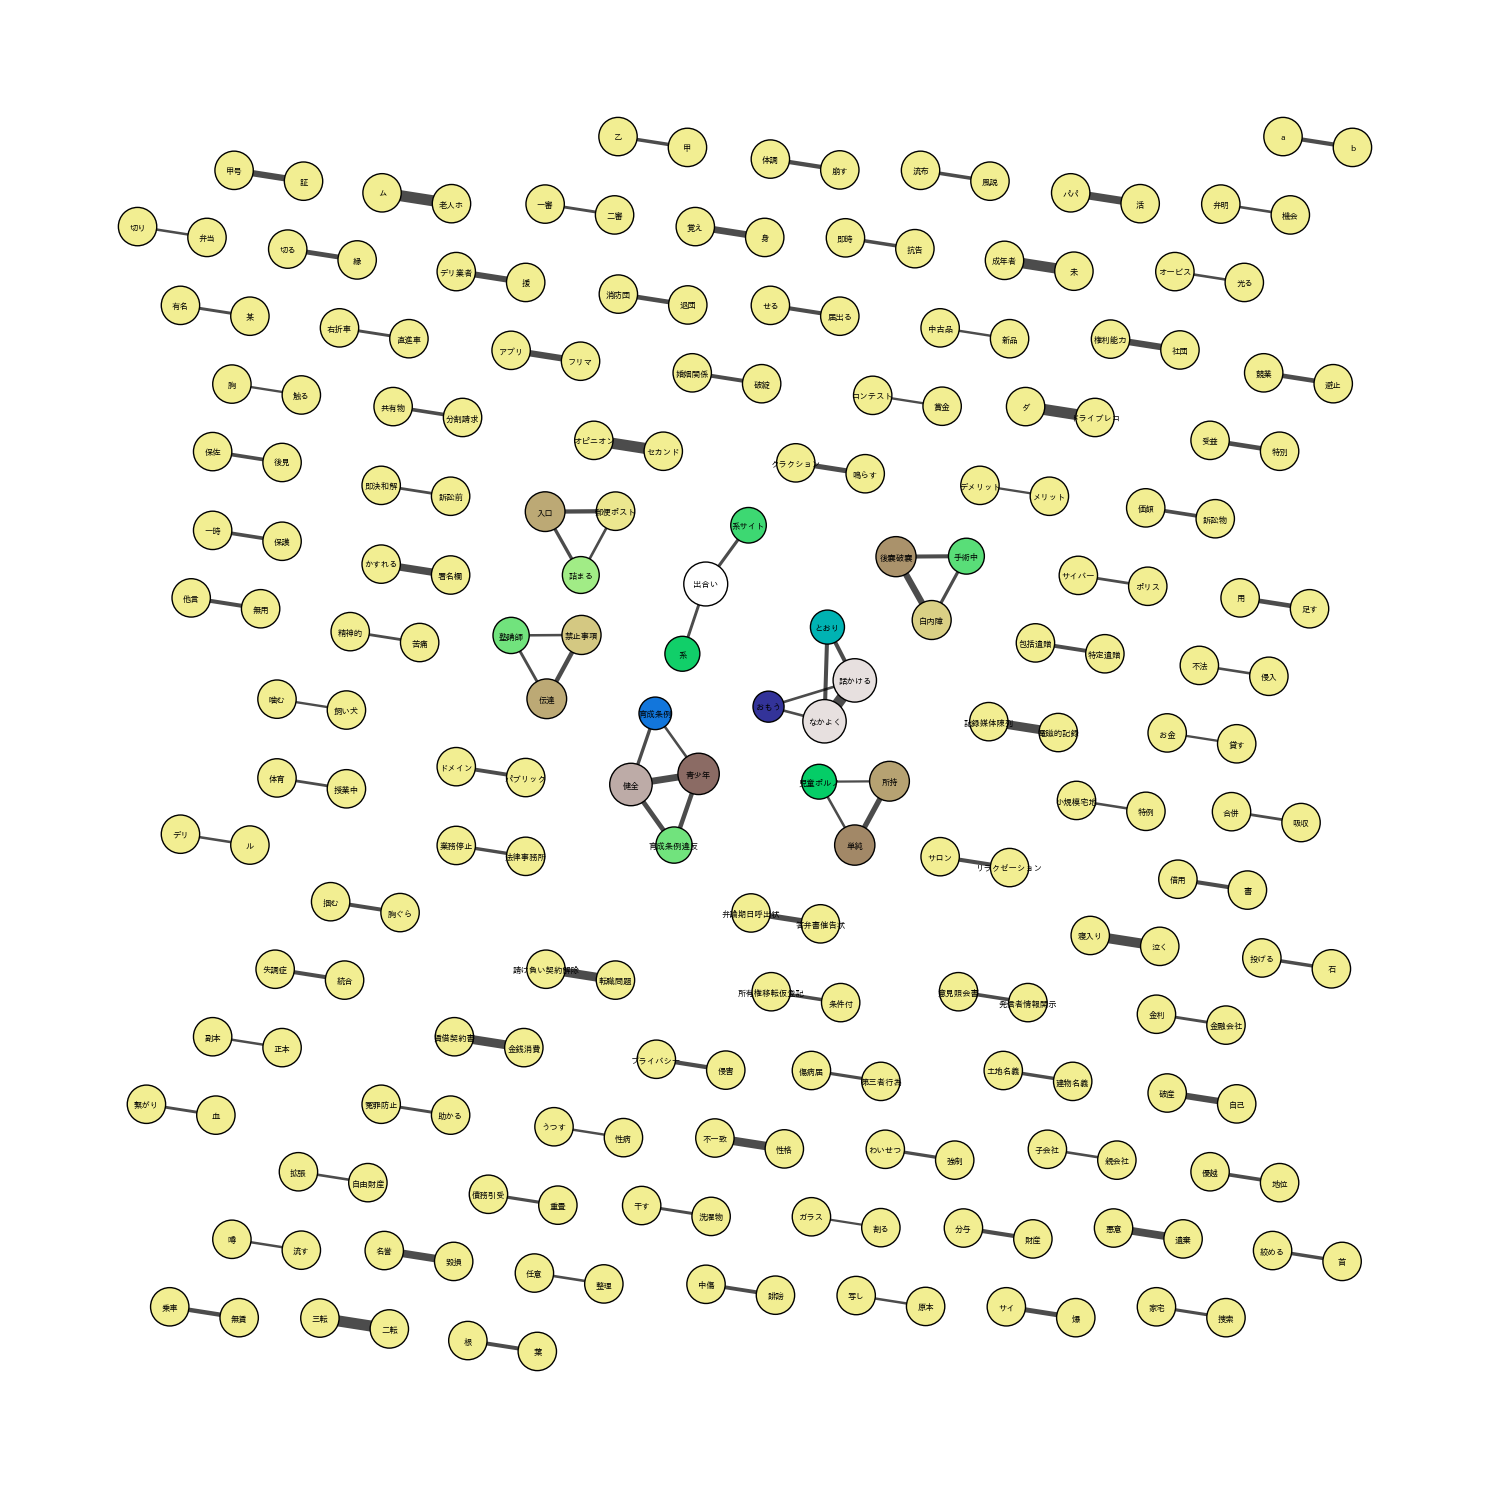

In [ ]:
conet(qus_title_terms, 'dst/conet/qus_title_terms.svg')

In [ ]:
conet(qus_body_terms, 'dst/conet/qus_body_terms.svg', min_count=5, edge_th=0.2)

: 

: 

In [ ]:
# conet(qus_title_terms, 'dst/conet/qus_title_terms.svg', min_count=4, edge_th=0.2)
conet(qus_body_terms, 'dst/conet/qus_body_terms.svg', min_count=5, edge_th=0.2)
conet(ans_body_terms, 'dst/conet/ans_body_terms.svg', min_count=4, edge_th=0.2)
conet(all_terms, 'dst/conet/all_terms.svg', min_count=4, edge_th=0.2)

: 

: 